# Different Examples of filter and filtfilt functions

| Resources | Links |
| --- | --- |
| Ardour open source code:        | https://github.com/djpohly/ardour/tree/master/libs/qm-dsp/dsp/signalconditioning |
| MATLAB filtfilt function info:  | https://de.mathworks.com/help/signal/ref/filtfilt.html |
| MATLAB filtfilt source code:    | type "open filtfilt" in MATLAB command window...  |
| SciPy filfilt open source code: |https://github.com/scipy/scipy/blob/master/scipy/signal/signaltools.py |
| SciPy filtfilt doc/example:     | https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html |
| SciPy cookbook example:         | https://scipy-cookbook.readthedocs.io/items/FiltFilt.html |

### Import Packages 

In [1]:
import os
import json
import pandas as pd
from scipy import signal
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import numpy as np

# Example from Scipy.org

link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

First we create a one second signal that is the sum of two pure sine waves, with frequencies 5 Hz and 250 Hz, sampled at 2000 Hz.

In [2]:
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh

Now create a lowpass Butterworth filter with a cutoff of 0.125 times the Nyquist frequency, or 125 Hz, and apply it to x with filtfilt. The result should be approximately xlow, with no phase shift.

In [3]:
b, a = signal.butter(8, 0.125)
print("b =")
print(b)
print("a =")
print(a)

b =
[8.88199322e-07 7.10559458e-06 2.48695810e-05 4.97391620e-05
 6.21739525e-05 4.97391620e-05 2.48695810e-05 7.10559458e-06
 8.88199322e-07]
a =
[  1.          -5.98842478  15.88837987 -24.35723742  23.57037937
 -14.72938334   5.80019014  -1.31502712   0.13135067]


In [4]:
print(len(a))
print(len(b))

9
9


In [5]:
y = signal.filtfilt(b, a, x, padlen=150)
np.abs(y - xlow).max()

9.108629580020788e-06

We get a fairly clean result for this artificial example because the odd extension is exact, and with the moderately long padding, the filter’s transients have dissipated by the time the actual data is reached. In general, transient effects at the edges are unavoidable.

The following example demonstrates the option method="gust".

First, create a filter.

In [6]:
b, a = signal.ellip(4, 0.01, 120, 0.125)  # Filter to be applied.
np.random.seed(123456)
print("b =")
print(b)
print("a =")
print(a)

b =
[0.00237299 0.00907825 0.01341973 0.00907825 0.00237299]
a =
[ 1.         -2.79367095  3.13535093 -1.64013531  0.33481939]


sig is a random input signal to be filtered.

In [7]:
n = 60
sig = np.random.randn(n)**3 + 3*np.random.randn(n).cumsum()

Apply filtfilt to sig, once using the Gustafsson method, and once using padding, and plot the results for comparison.

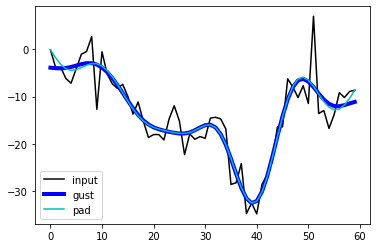

In [8]:
fgust = signal.filtfilt(b, a, sig, method="gust")
fpad = signal.filtfilt(b, a, sig, padlen=50)
plt.plot(sig, 'k-', label='input')
plt.plot(fgust, 'b-', linewidth=4, label='gust')
plt.plot(fpad, 'c-', linewidth=1.5, label='pad')
plt.legend(loc='best')
plt.show()

# Scipy Cookbook Example

link: https://scipy-cookbook.readthedocs.io/items/FiltFilt.html

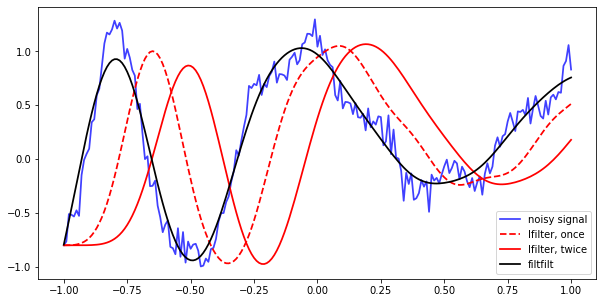

In [9]:
from numpy import sin, cos, pi, linspace
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter

#from matplotlib.pyplot import plot, legend, show, hold, grid, figure, savefig


# Generate a noisy signal to be filtered.
t = linspace(-1, 1, 201)
x = (sin(2 * pi * 0.75 * t*(1-t) + 2.1) + 0.1*sin(2 * pi * 1.25 * t + 1) +
    0.18*cos(2 * pi * 3.85 * t))
xn = x + randn(len(t)) * 0.08

# Create an order 3 lowpass butterworth filter.
b, a = butter(3, 0.05)

# Apply the filter to xn.  Use lfilter_zi to choose the initial condition
# of the filter.
zi = lfilter_zi(b, a)
z, _ = lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order
# the same as filtfilt.
z2, _ = lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter.
y = filtfilt(b, a, xn)


# Make the plot.
plt.figure(figsize=(10,5))
plt.plot(t, xn, 'b', linewidth=1.75, alpha=0.75)
plt.plot(t, z, 'r--', linewidth=1.75)
plt.plot(t, z2, 'r', linewidth=1.75)
plt.plot(t, y, 'k', linewidth=1.75)
plt.legend(('noisy signal',
        'lfilter, once',
        'lfilter, twice',
        'filtfilt'),
        loc='best')
plt.show()

#savefig('plot.png', dpi=65)

# Matlab ECG Example

link: https://de.mathworks.com/help/signal/ref/filtfilt.html

## import data and visualize matlab results

In [10]:
# set pandas dataframe to 3 decimals
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# data path for matlab data
data_path = os.path.join( os.getcwd(), 'data', 'filtfilt_ECG_matlab_data.CSV')

# load matlab results as pandas Dataframe
df_matlab_results = pd.read_csv(data_path, sep=';')

In [11]:
df_matlab_results.head()

,index,wform,noise,wform_noisy,y_filtfilt,y_filter
0,1,0.000000,0.053767,0.053767,0.054139,3.170140e-10
1,2,0.000273,0.183389,0.183662,0.036004,7.547177e-09
2,3,0.000547,-0.225885,-0.225338,0.021627,8.555868e-08
3,4,0.000820,0.086217,0.087037,0.014049,6.218124e-07
4,5,0.001093,0.031877,0.032970,0.014988,3.284036e-06


plot matlab results

In [12]:
index = df_matlab_results.index
wform = df_matlab_results.wform
wform_noisy = df_matlab_results.wform_noisy
y_filtfilt = df_matlab_results.y_filtfilt
y_filter = df_matlab_results.y_filter

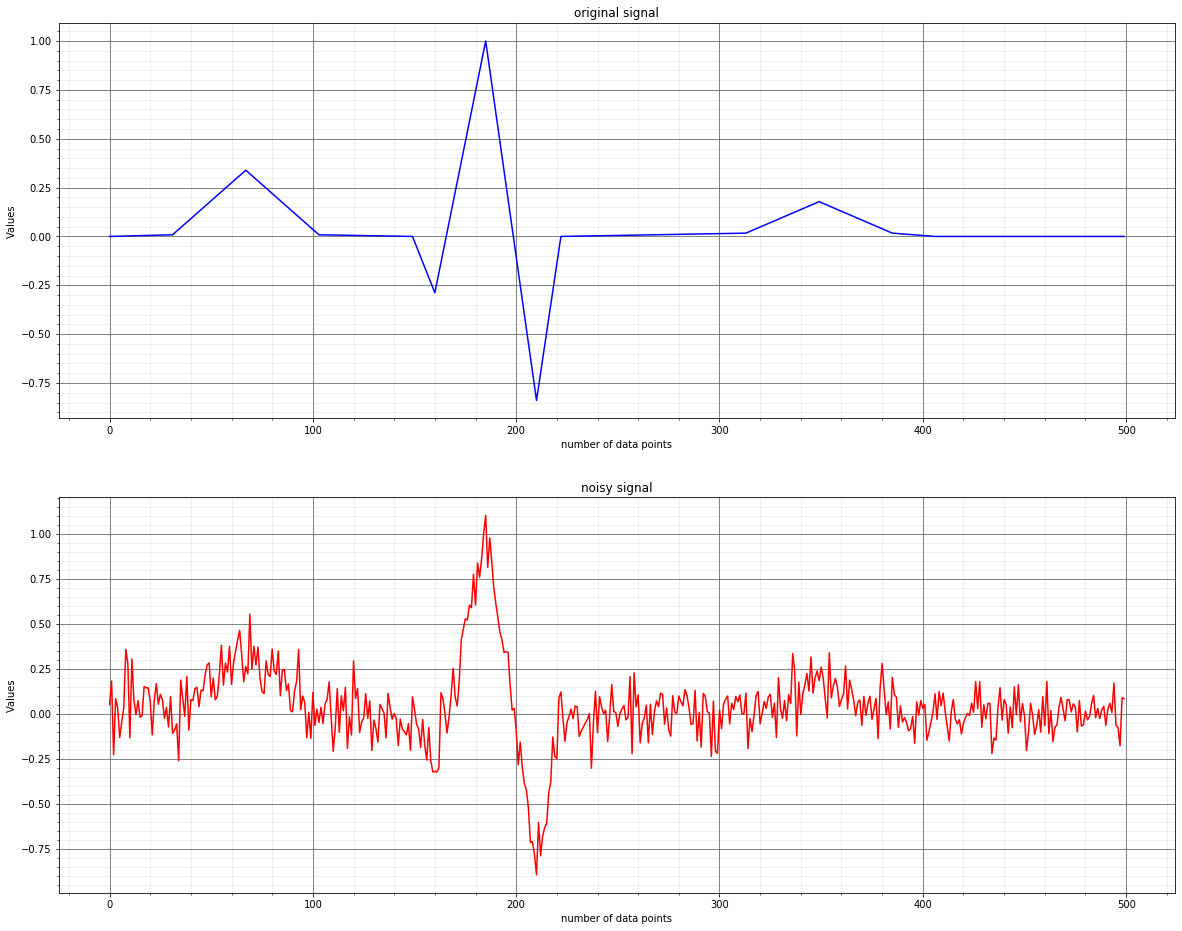

In [13]:
fig, (ax0, ax1) = plt.subplots(2, figsize=(20,16))

ax0.plot(index, wform, color='blue', label ='orginal signal')
ax1.plot(index, wform_noisy, color='red', label ='noisy signal')

ax0.set_title('original signal')
ax0.set_xlabel('number of data points')
ax0.set_ylabel('Values')
ax0.grid(b=True, which='major', color='#666666', linestyle='-')
ax0.minorticks_on()
ax0.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax1.set_title('noisy signal')
ax1.set_xlabel('number of data points')
ax1.set_ylabel('Values')
ax1.grid(b=True, which='major', color='#666666', linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show();

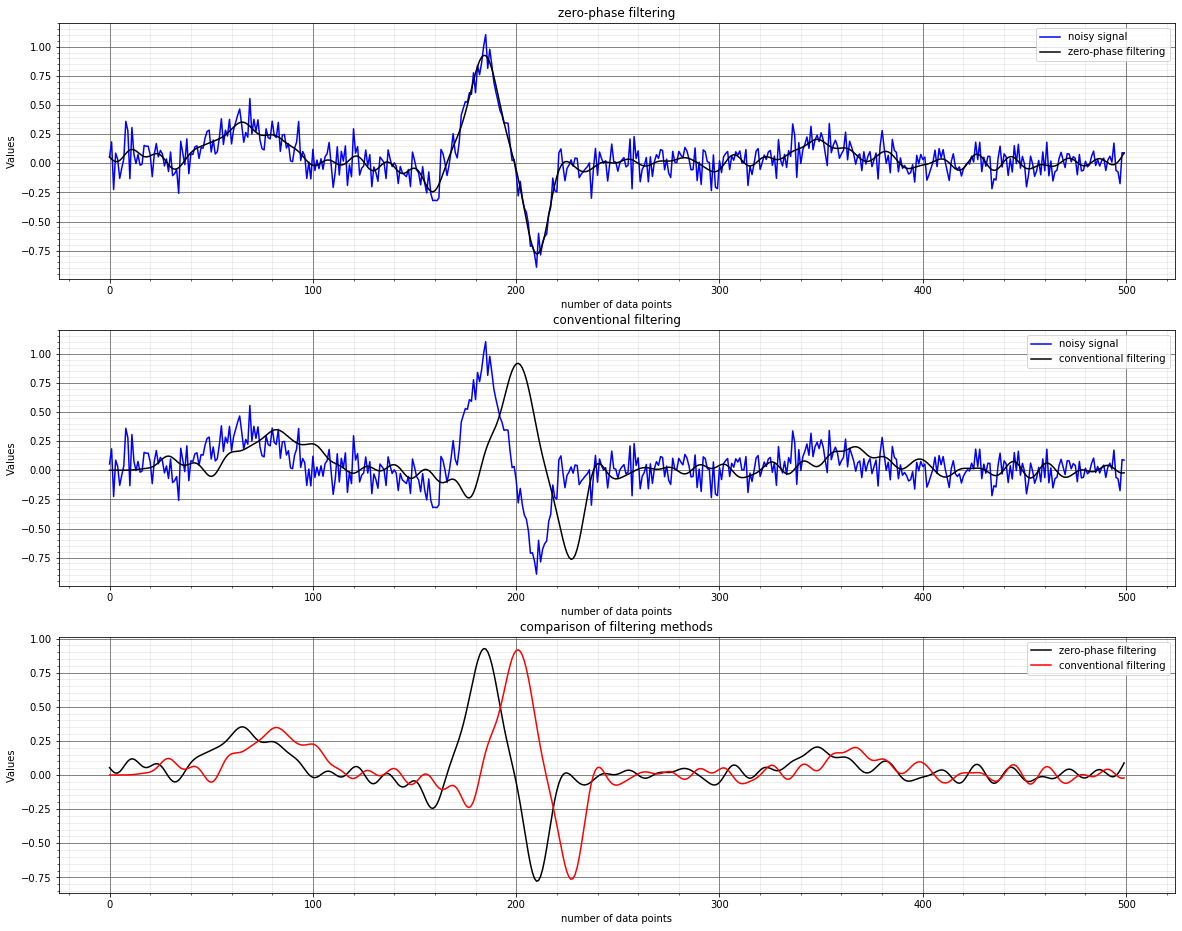

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(3, figsize=(20,16))

ax0.plot(index, wform_noisy, color='blue', label ='noisy signal')
ax0.plot(index, y_filtfilt, color='black', label ='zero-phase filtering')
ax1.plot(index, wform_noisy, color='blue', label ='noisy signal')
ax1.plot(index, y_filter, color='black', label ='conventional filtering')
ax2.plot(index, y_filtfilt, color='black', label ='zero-phase filtering')
ax2.plot(index, y_filter, color='red', label ='conventional filtering')

ax0.set_title('zero-phase filtering')
ax0.set_xlabel('number of data points')
ax0.set_ylabel('Values')
ax0.legend()
ax0.grid(b=True, which='major', color='#666666', linestyle='-')
ax0.minorticks_on()
ax0.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax1.set_title('conventional filtering')
ax1.set_xlabel('number of data points')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid(b=True, which='major', color='#666666', linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax2.set_title('comparison of filtering methods')
ax2.set_xlabel('number of data points')
ax2.set_ylabel('Values')
ax2.legend()
ax2.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.minorticks_on()
ax2.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show();

# Scipy filtfilt on ECG data

In [18]:
# data path for matlab data
data_path = os.path.join( os.getcwd(), 'data', 'filtfilt_ECG_matlab_data.CSV')
filter_path = os.path.join( os.getcwd(), 'data', 'matlab_ECG_filter.CSV')

# load matlab results as pandas Dataframe
df_matlab_results = pd.read_csv(data_path, sep=';')
df_filter = pd.read_csv(filter_path, sep=';')

In [19]:
df_matlab_results.head()

,index,wform,noise,wform_noisy,y_filtfilt,y_filter
0,1,0.000000,0.053767,0.053767,0.054139,3.170140e-10
1,2,0.000273,0.183389,0.183662,0.036004,7.547177e-09
2,3,0.000547,-0.225885,-0.225338,0.021627,8.555868e-08
3,4,0.000820,0.086217,0.087037,0.014049,6.218124e-07
4,5,0.001093,0.031877,0.032970,0.014988,3.284036e-06


In [20]:
df_filter.head()

,index,num_filt,den_filt
0,1,5.900000e-09,1.000000
1,2,7.080000e-08,-8.391179
2,3,3.890000e-07,32.679957
3,4,1.300000e-06,-78.015495
4,5,2.920000e-06,127.021368


In [21]:
index = df_matlab_results.index
wform = df_matlab_results.wform
wform_noisy = df_matlab_results.wform_noisy
y_filtfilt = df_matlab_results.y_filtfilt
y_filter = df_matlab_results.y_filter

num_filt = df_filter.num_filt
den_filt = df_filter.den_filt

In [22]:
y_scipy = filtfilt(num_filt, den_filt, wform_noisy)

y_error = y_filtfilt - y_scipy

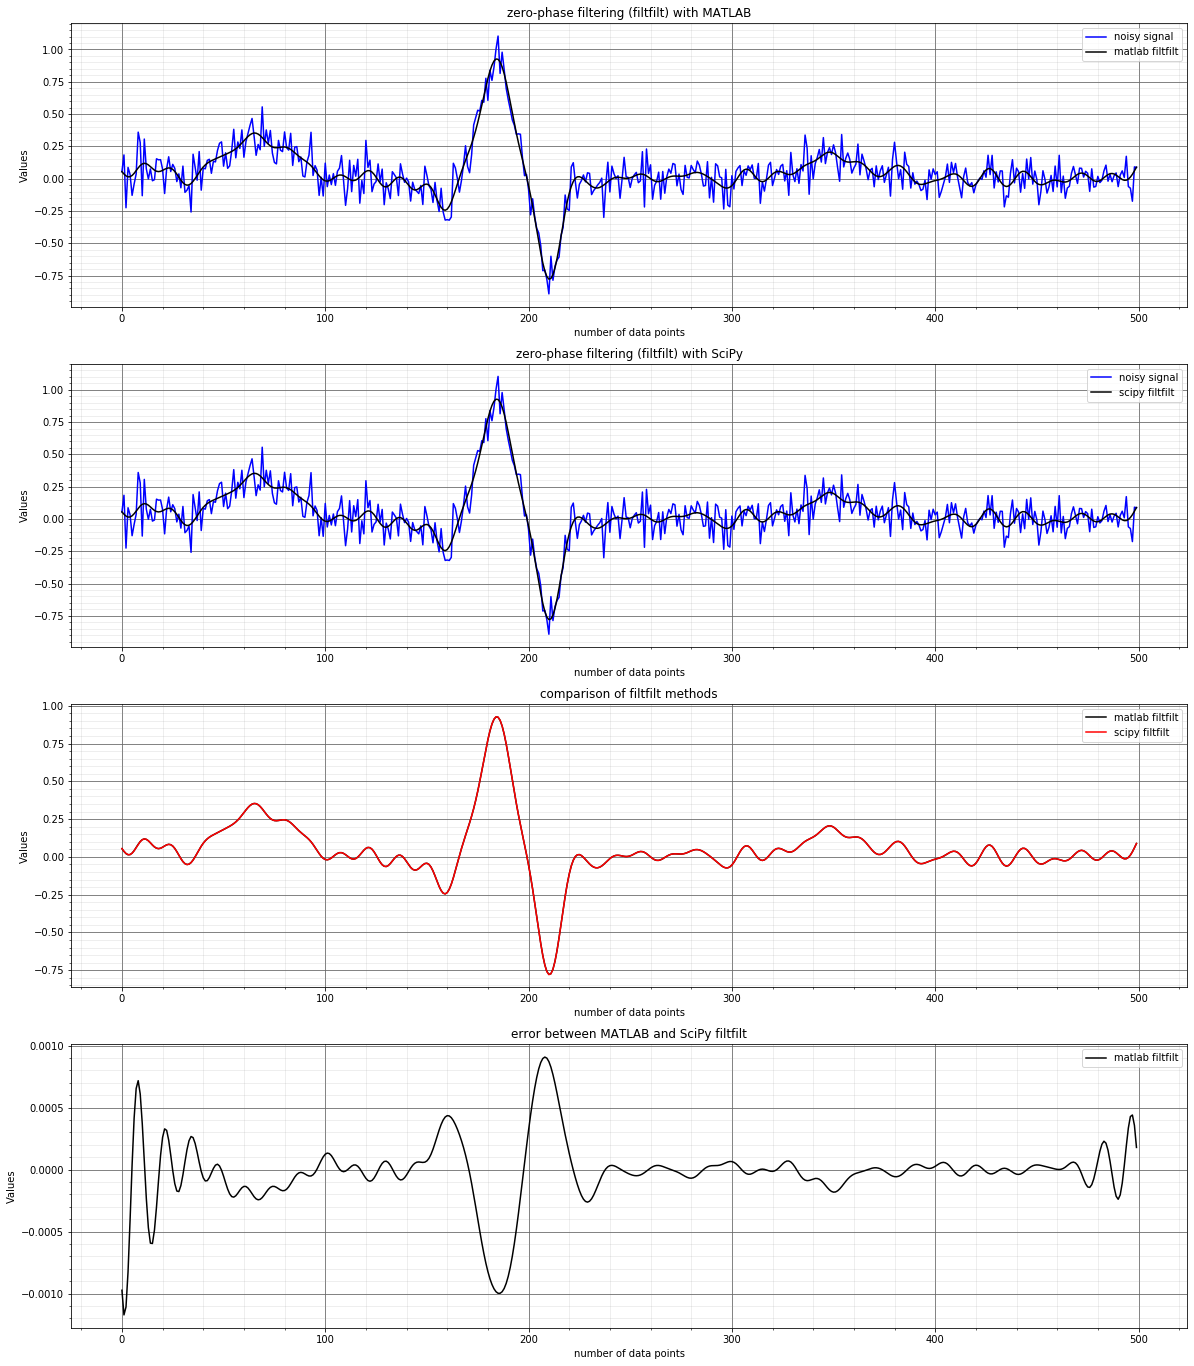

In [23]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, figsize=(20,24))

ax0.plot(index, wform_noisy, color='blue', label ='noisy signal')
ax0.plot(index, y_filtfilt, color='black', label ='matlab filtfilt')
ax1.plot(index, wform_noisy, color='blue', label ='noisy signal')
ax1.plot(index, y_scipy, color='black', label ='scipy filtfilt')
ax2.plot(index, y_filtfilt, color='black', label ='matlab filtfilt')
ax2.plot(index, y_scipy, color='red', label ='scipy filtfilt')
ax3.plot(index, y_error, color='black', label ='matlab filtfilt')

ax0.set_title('zero-phase filtering (filtfilt) with MATLAB')
ax0.set_xlabel('number of data points')
ax0.set_ylabel('Values')
ax0.legend()
ax0.grid(b=True, which='major', color='#666666', linestyle='-')
ax0.minorticks_on()
ax0.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax1.set_title('zero-phase filtering (filtfilt) with SciPy')
ax1.set_xlabel('number of data points')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid(b=True, which='major', color='#666666', linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax2.set_title('comparison of filtfilt methods')
ax2.set_xlabel('number of data points')
ax2.set_ylabel('Values')
ax2.legend()
ax2.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.minorticks_on()
ax2.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax3.set_title('error between MATLAB and SciPy filtfilt')
ax3.set_xlabel('number of data points')
ax3.set_ylabel('Values')
ax3.legend()
ax3.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.minorticks_on()
ax3.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show();